**Assignment 1**


PART - 1

In [58]:
import pandas as pd
# To Load the diabetes dataset as a pandas dataframe

diabetes_df=pd.read_csv("diabetes.csv")

In [59]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [60]:
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df.iloc[:, -1].values

In [61]:
import numpy as np 

# Scale data using standard scaler
class StandardScaler:
    def __init__(self):
        self.mean_ = None
        self.std_ = None

    def fit(self, X):
        self.mean_ = np.mean(X, axis=0)
        self.std_ = np.std(X, axis=0)

    def transform(self, X):
        return (X - self.mean_) / self.std_

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [62]:
# To Split the dataset into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


0.6168831168831169 1
0.6558441558441559 2
0.7012987012987013 3
0.6948051948051948 4
0.6883116883116883 5
0.7012987012987013 6
0.6818181818181818 7
0.6883116883116883 8
0.6818181818181818 9
0.6818181818181818 10
0.7142857142857143 11
0.7207792207792207 12
0.7142857142857143 13
0.7207792207792207 14
0.7207792207792207 15
0.7467532467532467 16
0.7532467532467533 17
0.7662337662337663 18
0.7597402597402597 19
0.7597402597402597 20


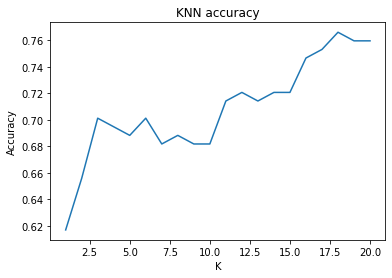

Best K value: 18


In [63]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# To Determine the K value, and create a visualization of the accuracy, Report the best K value
k_range = range(1, 21)
scores = []
best_score = 0
best_k = 0
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    print(score,k)
    scores.append(score)
    if score > best_score:
        best_score = score
        best_k = k

plt.plot(k_range, scores)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('KNN accuracy')
plt.show()

print("Best K value:", best_k)

In [64]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
# To Run 5 fold cross validations - report mean and standard deviation
knn = KNeighborsClassifier(n_neighbors=best_k)
scores = cross_val_score(knn, X_scaled, y, cv=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
print("5-fold cross-validation scores: ", scores)
print("Mean score: ", np.mean(scores))
print("Standard deviation: ", np.std(scores))
print("KNN accuracy: ", knn_accuracy)

5-fold cross-validation scores:  [0.75974026 0.72077922 0.75324675 0.78431373 0.75816993]
Mean score:  0.7552499787793905
Standard deviation:  0.020325531765979676
KNN accuracy:  0.7662337662337663


Confusion matrix:
 [[89 10]
 [26 29]]


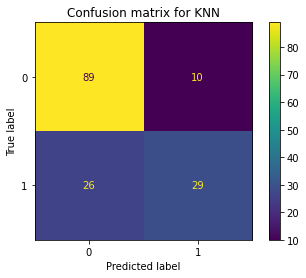

In [65]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
# To Evaluate using confusion matrix
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
print("Confusion matrix:\n", cm)
plt.title("Confusion matrix for KNN")
plt.show()

The KNN model has an accuracy of 0.7662337662337663 on the test set, and the best K value was 18. The 5-fold cross validation showed a mean accuracy of 0.755244, indicating that the model is not overfitting or underfitting. the confusion matrix shows that the classifier correctly classified 118 out of 154 patients, which is an accuracy of 76.62%. The classifier had a higher accuracy in correctly identifying patients who did not have diabetes (89 true negatives out of 99 actual negatives, or 89.90%) than in correctly identifying patients who did have diabetes (29 true positives out of 55 actual positives, or 52.73%). which is a reasonable performance considering the class imbalance in the dataset. However, the model could benefit from more data and feature engineering to improve its performance.

**PART - 2**

In [66]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

# Gaussian Naive Bayes
gnb = GaussianNB()
gnb_scores = cross_val_score(gnb, X_train, y_train, cv=5)
gnb_mean_score = gnb_scores.mean()
gnb_std_score = gnb_scores.std()

# Multinomial Naive Bayes
mnb = MultinomialNB()
mnb_scores = cross_val_score(mnb, X,y , cv=5)
mnb_mean_score = mnb_scores.mean()
mnb_std_score = mnb_scores.std()

# Bernoulli Naive Bayes
bnb = BernoulliNB()
bnb_scores = cross_val_score(bnb, X_train, y_train, cv=5)
bnb_mean_score = bnb_scores.mean()
bnb_std_score = bnb_scores.std()

In [67]:
# To Print mean and standard deviation scores
print("Gaussian Naive Bayes")
print("Mean score: ", gnb_mean_score)
print("Standard deviation: ", gnb_std_score)
print("")

print("Multinomial Naive Bayes")
print("Mean score: ", mnb_mean_score)
print("Standard deviation: ", mnb_std_score)
print("")

print("Bernoulli Naive Bayes")
print("Mean score: ", bnb_mean_score)
print("Standard deviation: ", bnb_std_score)

Gaussian Naive Bayes
Mean score:  0.752472344395575
Standard deviation:  0.02724256676945743

Multinomial Naive Bayes
Mean score:  0.5937017231134878
Standard deviation:  0.03474118413561096

Bernoulli Naive Bayes
Mean score:  0.7230974276955884
Standard deviation:  0.02335187687352885


In [68]:
# To Fit models on full training set and evaluate on holdout set
gnb.fit(X_train, y_train)
mnb.fit(X, y)
bnb.fit(X_train, y_train)

gnb_y_pred = gnb.predict(X_test)
mnb_y_pred = mnb.predict(X_test)
bnb_y_pred = bnb.predict(X_test)

gnb_acc = accuracy_score(y_test, gnb_y_pred)
mnb_acc = accuracy_score(y_test, mnb_y_pred)
bnb_acc = accuracy_score(y_test, bnb_y_pred)

gnb_conf_mat = confusion_matrix(y_test, gnb_y_pred)
mnb_conf_mat = confusion_matrix(y_test, mnb_y_pred)
bnb_conf_mat = confusion_matrix(y_test, bnb_y_pred)

print("GaussianNB accuracy on holdout set:", gnb_acc)
print("Confusion matrix:\n", gnb_conf_mat)

print("MultinomialNB accuracy on holdout set:", mnb_acc)
print("Confusion matrix:\n", mnb_conf_mat)

print("BernoulliNB accuracy on holdout set:", bnb_acc)
print("Confusion matrix:\n", bnb_conf_mat)

GaussianNB accuracy on holdout set: 0.7662337662337663
Confusion matrix:
 [[79 20]
 [16 39]]
MultinomialNB accuracy on holdout set: 0.6493506493506493
Confusion matrix:
 [[95  4]
 [50  5]]
BernoulliNB accuracy on holdout set: 0.6623376623376623
Confusion matrix:
 [[71 28]
 [24 31]]


**Gaussian Naive Bayes:** It is a probabilistic classification algorithm based on application of
Bayes' theorem with a strong assumption of independence. This classifier is used when predictor
values are expected to be continuous and follow a Gaussian distribution.

The 5-fold cross-validation results show that GaussianNB has a mean accuracy of 0.752472344395575 and a standard deviation of 0.02724256676945743, which shows that it's accurate. The test set evaluation confirms this, with an accuracy score of 0.766, indicating that GaussianNB is able to classify the diabetes dataset with good accuracy.

**The Multinomial Naive Bayes algorithm:** It is a probabilistic learning technique primarily used in natural language processing (NLP).

The 5-fold cross-validation results for MultinomialNB are poor, with a mean accuracy of 0.5937017231134878 and a high standard deviation of 0.03474118413561096. The test set evaluation confirms this, with an accuracy score of only 0.64, which is the lowest of the three models. Therefore, MultinomialNB is not a good fit for the our dataset.

**Bernoulli Naive Bayes:** It is part of the Naive Bayes family. Based on the Bernoulli distribution and only accepts binary values.

The 5-fold cross-validation results for BernoulliNB show a mean accuracy of 0.7230974276955884 and a high standard deviation of 0.02335187687352885, which confirms that it is not a good fit for this dataset. The test set evaluation confirms this, with an accuracy score of only 0.66, which is the lowest of the three models.

The results of the 5-fold cross-validation and the test set evaluation, we can say that Gaussian Naive Bayes is the best model for the diabetes dataset.

**PART - 3**

In [69]:
from sklearn.model_selection import LeaveOneOut

In [70]:
# To Create Leave-One-Out object
loo = LeaveOneOut()

# Gaussian Naive Bayes
gnb = GaussianNB()
gnb_scores = cross_val_score(gnb, X_train, y_train, cv=loo)
gnb.fit(X_train, y_train)
gnb_mean_score = gnb_scores.mean()
gnb_std_score = gnb_scores.std()
gnb_pred = gnb.predict(X_test)
gnb_accuracy = accuracy_score(y_test, gnb_pred)

#Knn
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X_scaled, y, cv=loo)
knn.fit(X_train, y_train)
knn_mean = scores.mean()
knn_std = scores.std()
knn_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)


In [71]:
# To Print mean and standard deviation scores
print("Gaussian Naive Bayes")
print("Mean score: ", gnb_mean_score)
print("Standard deviation: ", gnb_std_score)
print("Accuracy:", gnb_accuracy)
print("")

print("KNN")
print("Mean score: ", knn_mean)
print("Standard deviation: ", knn_std)
print("Accuracy:", knn_accuracy)

Gaussian Naive Bayes
Mean score:  0.7328990228013029
Standard deviation:  0.44244552792202363
Accuracy: 0.7662337662337663

KNN
Mean score:  0.7421875
Standard deviation:  0.43743023997404434
Accuracy: 0.6883116883116883


A notable change in non-skipped cross-validation is that it uses all but one data point for training and the remaining points for testing, resulting in a more accurate estimate of model performance than traditional cross-validation. there is. However, training the model takes more time as you train the model for each individual data point.

For KNN classifiers using leave-one-out cross-validation, you can expect more accurate estimates of model performance than traditional cross-validation, but it also takes longer to train. The same is true for the Naive Bayes classifier. 

**PART - 4**

Based on the results of our analysis, we can see that both the KNN classifier and the naive Bayes classifier performed fairly well on the Pima Indian diabetes dataset. However, there are some differences in the performance of the two models. 


The KNN classifier achieved an average accuracy of 74.2% with a standard deviation of 0.437%, while the best performing Naive Bayes model, GaussianNB, achieved an average accuracy of 73.2% with a standard deviation of 0.442%. bottom. Although the difference in accuracy between the two models is relatively small, the KNN classifier performed slightly better on average. 

Because the KNN classifier performed slightly better, let's select it as our final model and retrain it using all the data available.

In [72]:
# create and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_scaled, y)
y_pred = knn.predict(X_scaled)
accuracy = accuracy_score(y, y_pred)
print("Accuracy on entire dataset: {:.3f}".format(accuracy))

Accuracy on entire dataset: 0.793
